In [1]:
import pickle
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cross_validation import train_test_split
pd.options.mode.chained_assignment = None
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

with open("TEST_movie_data.pkl", 'r') as picklefile:
     all_movies = pickle.load(picklefile)

In [54]:
df = pd.DataFrame(all_movies)

In [55]:
df['production_budget'] = df['production_budget']*1000000
df['budget'] = 0
df['budget'][df['imdb_budget'] != 0]  = df['imdb_budget']
df['budget'][df['imdb_budget'] == 0]  = df['production_budget']
df['budget'] = df['budget'].replace(0, np.nan)
df['month'] = df['release_date'].map(lambda x: x.month)
df['worldwide_gross'] = df['worldwide_gross'].where(df['worldwide_gross']!=0, np.nan) 
df['foreign_gross'] = df['foreign_gross'].where(df['foreign_gross']!=0, np.nan) 
df = df.sort(['domestic_gross'], ascending = False)
df = df[df.budget <= 270000000]
df

,director,distributor,domestic_gross,foreign_gross,genre,imdb_budget,production_budget,rating,release_date,runtime,title,worldwide_gross,budget,month
0,Joss Whedon,Buena Vista,623357910,896200000,Action / Adventure,220000000,2.200000e+08,PG-13,2012-05-04,142,Marvel's The Avengers,1519557910,220000000,5
1,Christopher Nolan,Warner Bros.,448139099,636300000,Action Thriller,250000000,2.500000e+08,PG-13,2012-07-20,165,The Dark Knight Rises,1084439099,250000000,7
665,Francis Lawrence,Lionsgate,424668047,440244916,Action / Adventure,130000000,1.300000e+08,PG-13,2013-11-22,146,The Hunger Games: Catching Fire,864912963,130000000,11
666,Shane Black,Buena Vista,409013994,806426000,Action / Adventure,200000000,2.000000e+08,PG-13,2013-05-03,129,Iron Man 3,1215439994,200000000,5
2,Gary Ross,Lionsgate,408010692,283237076,Action / Adventure,78000000,7.800000e+07,PG-13,2012-03-23,142,The Hunger Games,691247768,78000000,3
667,Chris Buck,Buena Vista,400738009,873481000,Animation,150000000,1.500000e+08,PG,2013-11-22,108,Frozen,1274219009,150000000,11
668,Pierre Coffin,Universal,368061265,602700620,Animation,76000000,7.600000e+07,PG,2013-07-03,98,Despicable Me 2,970761885,76000000,7
1352,Clint Eastwood,Warner Bros.,350126372,197000000,Drama,58800000,5.880000e+07,R,2014-12-25,132,American Sniper,547126372,58800000,12
1353,Francis Lawrence,Lionsgate,337135885,414964344,Action / Adventure,125000000,1.250000e+08,PG-13,2014-11-21,123,The Hunger Games: Mockingjay - Part 1,752100229,125000000,11
1354,James Gunn,Buena Vista,333176600,441000000,Action / Adventure,170000000,1.700000e+08,PG-13,2014-08-01,121,Guardians of the Galaxy,774176600,170000000,8


###Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [33]:
y1, X1 = dmatrices('domestic_gross ~ 1', data=df, return_type='dataframe')
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 28 Jul 2015   Prob (F-statistic):                nan
Time:                        15:26:59   Log-Likelihood:                -14382.
No. Observations:                 737   AIC:                         2.877e+04
Df Residuals:                     736   BIC:                         2.877e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    4.13e+07   2.66e+06     15.512      0.000      3.61e+07  4.65e+07
==============================================================================
Omnibus:                      509.089   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5925.228
Skew:                           3.064   Prob(JB):                         0.00
Kurtosis:                      15.466   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using a constant term as the predictor for domestic total gross is not an effective model.  This is shown by the R^2 and adjusted R^2 values being 0. This model basically predicts that the domestic gross will always be around $15.8 million.

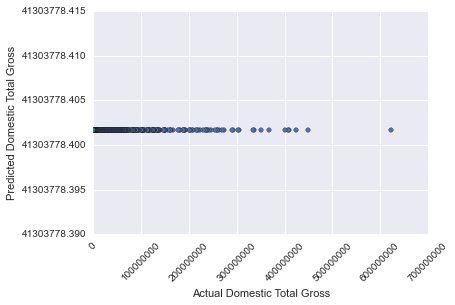

In [34]:
y1pred = results1.predict()
plt.scatter(y1, y1pred)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
plt.xticks(rotation=45)
plt.show()

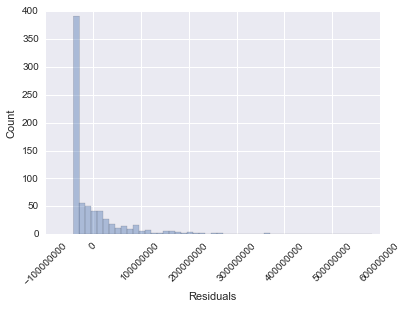

In [35]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
y1res = results1.resid
sns.distplot(y1res, kde = False)
plt.xticks(rotation=45)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

Not surprisingly, the residuals are not normally distributed. The residuals are heavily left skewed.

###Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [36]:
y2, X2 = dmatrices('domestic_gross ~ budget +1', data=df, return_type='dataframe')
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     776.4
Date:                Tue, 28 Jul 2015   Prob (F-statistic):          3.52e-117
Time:                        15:27:11   Log-Likelihood:                -14116.
No. Observations:                 737   AIC:                         2.824e+04
Df Residuals:                     735   BIC:                         2.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.264e+06   2.28e+06      1.866      0.062     -2.21e+05  8.75e+06
budget         1.0489      0.038     27.865      0.000         0.975     1.123
==============================================================================
Omnibus:                      392.843   Durbin-Watson:                   0.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5921.087
Skew:                           2.039   Prob(JB):                         0.00
Kurtosis:                      16.274   Cond. No.                     7.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

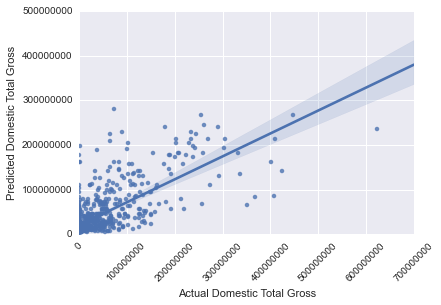

In [37]:
y2pred = results2.predict()
sns.regplot(x=y2, y=y2pred, data = df)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

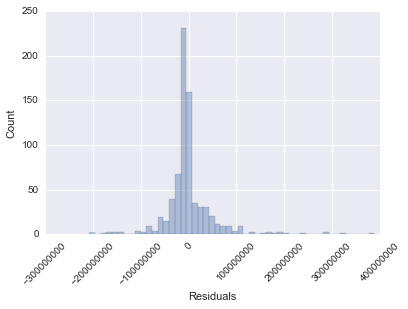

In [38]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
y2res = results2.resid
sns.distplot(y2res, kde = False)
plt.xticks(rotation=45)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

>This model does a better job of predicting the domestic gross but is still only about 50% accurate.  The residuals are looking more normally distributed than they did with only a constant predictor.

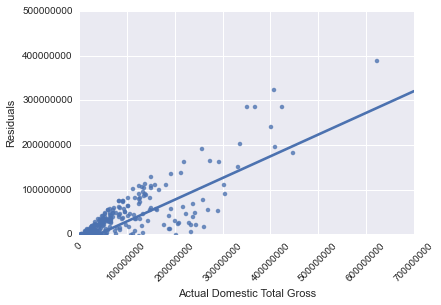

In [40]:
y2pred = results2.predict()
sns.regplot(x=y2, y=y2res, data = df, ci = None)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Residuals")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

>I also looked at the relationship between the actual gross and the residuals.  It appears that when a movie grosses more, there will be more error in the prediction.

###Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [43]:
y3, X3 = dmatrices('domestic_gross ~ budget + rating + 1', data=df, return_type='dataframe')
model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 28 Jul 2015   Prob (F-statistic):          4.48e-115
Time:                        15:32:04   Log-Likelihood:                -14106.
No. Observations:                 737   AIC:                         2.823e+04
Df Residuals:                     730   BIC:                         2.826e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         -1.924e+07    1.4e+07     -1.371      0.171     -4.68e+07  8.31e+06
rating[T.NC-17]    1.021e+07   5.18e+07      0.197      0.844     -9.16e+07  1.12e+08
rating[T.PG]        3.58e+07   1.49e+07      2.404      0.016      6.57e+06   6.5e+07
rating[T.PG-13]    3.023e+07   1.42e+07      2.124      0.034      2.29e+06  5.82e+07
rating[T.R]        2.605e+07   1.42e+07      1.830      0.068      -1.9e+06   5.4e+07
rating[T.Unrated]  9.615e+06   1.47e+07      0.656      0.512     -1.92e+07  3.84e+07
budget                1.0017      0.041     24.634      0.000         0.922     1.082
==============================================================================
Omnibus:                      407.049   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6283.892
Skew:                           2.133   Prob(JB):                         0.00
Kurtosis:                      16.654   Cond. No.                     1.74e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

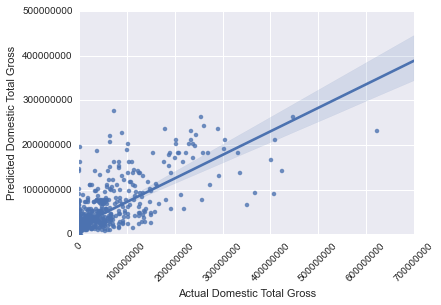

In [44]:
y3pred = results3.predict()
sns.regplot(x=y3, y=y3pred, data = df)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

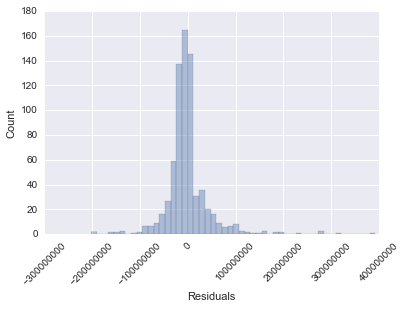

In [45]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
y3res = results3.resid
sns.distplot(y3res, kde = False)
plt.xticks(rotation=45)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

>Adding the rating as a variable only slighly improves the model in this case.

###Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [60]:
y4, X4 = dmatrices('domestic_gross ~ budget + rating + genre', data=df, return_type='dataframe')
model4 = sm.OLS(y4, X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     15.68
Date:                Tue, 28 Jul 2015   Prob (F-statistic):           9.53e-92
Time:                        15:37:45   Log-Likelihood:                -14065.
No. Observations:                 737   AIC:                         2.825e+04
Df Residuals:                     677   BIC:                         2.853e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                   -3.375e+07   1.93e+07     -1.746      0.081     -7.17e+07  4.21e+06
rating[T.NC-17]              1.557e+07   5.23e+07      0.298      0.766     -8.72e+07  1.18e+08
rating[T.PG]                 4.171e+07   1.54e+07      2.704      0.007      1.14e+07   7.2e+07
rating[T.PG-13]              3.377e+07   1.62e+07      2.083      0.038      1.93e+06  6.56e+07
rating[T.R]                  3.182e+07   1.63e+07      1.947      0.052     -2.67e+05  6.39e+07
rating[T.Unrated]            1.922e+07   1.65e+07      1.164      0.245     -1.32e+07  5.16e+07
genre[T.Action / Adventure]  5.819e+07   1.45e+07      4.002      0.000      2.96e+07  8.67e+07
genre[T.Action / Crime]     -1.573e+07   5.02e+07     -0.313      0.754     -1.14e+08  8.28e+07
genre[T.Action Comedy]       2.355e+07   1.73e+07      1.357      0.175     -1.05e+07  5.76e+07
genre[T.Action Drama]        -2.24e+07   1.94e+07     -1.154      0.249     -6.05e+07  1.57e+07
genre[T.Action Horror]      -1.519e+07   2.13e+07     -0.715      0.475     -5.69e+07  2.65e+07
genre[T.Action Thriller]     3.412e+06   1.62e+07      0.211      0.833     -2.83e+07  3.52e+07
genre[T.Adventure]          -1.331e+07   2.07e+07     -0.642      0.521     -5.41e+07  2.74e+07
genre[T.Animation]           1.947e+07   1.51e+07      1.288      0.198     -1.02e+07  4.92e+07
genre[T.Comedy]              2.028e+07    1.2e+07      1.685      0.092     -3.35e+06  4.39e+07
genre[T.Comedy / Drama]      9.083e+06   1.41e+07      0.643      0.521     -1.87e+07  3.68e+07
genre[T.Comedy Thriller]     1.439e+07   5.06e+07      0.285      0.776     -8.49e+07  1.14e+08
genre[T.Concert]             1.084e+07   5.09e+07      0.213      0.831      -8.9e+07  1.11e+08
genre[T.Crime]              -1.609e+07   2.45e+07     -0.656      0.512     -6.42e+07  3.21e+07
genre[T.Crime Drama]         6.567e+06   1.71e+07      0.385      0.701      -2.7e+07  4.01e+07
genre[T.Crime Thriller]     -9.276e+06   2.68e+07     -0.347      0.729     -6.18e+07  4.33e+07
genre[T.Documentary]         8.246e+06   1.36e+07      0.606      0.545     -1.85e+07   3.5e+07
genre[T.Drama]               8.226e+06   1.18e+07      0.697      0.486     -1.49e+07  3.14e+07
genre[T.Drama / Thriller]    2.754e+07   3.04e+07      0.907      0.365     -3.21e+07  8.71e+07
genre[T.Family]              1.646e+07   2.77e+07      0.595      0.552     -3.78e+07  7.08e+07
genre[T.Family Adventure]   -3.371e+07   2.79e+07     -1.209      0.227     -8.84e+07   2.1e+07
genre[T.Family Comedy]      -2.496e+07   3.71e+07     -0.673      0.501     -9.78e+07  4.79e+07
genre[T.Fantasy]            -2.359e+06   1.99e+07     -0.119      0.906     -4.14e+07  3.67e+07
genre[T.Fantasy Comedy]      6.776e+06   3.65e+07      0.186      0.853     -6.49e+07  7.84e+07
genre[T.Fan

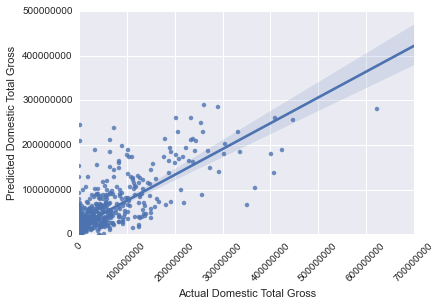

In [61]:
y4pred = results4.predict()
sns.regplot(x=y4, y=y4pred, data = df)
plt.xlabel("Actual Domestic Total Gross")
plt.ylabel("Predicted Domestic Total Gross")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

###Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [62]:
x_train, x_test, y_train, y_test = train_test_split(
    X4, y4, test_size=0.25, random_state=0)

model5 = LinearRegression()
model5.fit(x_train, y_train)
model5.score(x_test, y_test)

0.63576623985621583

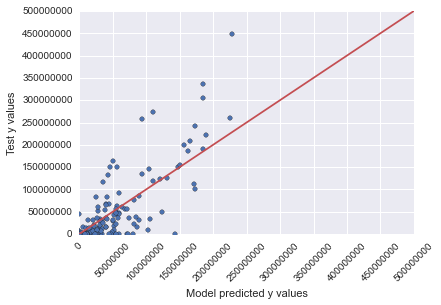

In [63]:
ytestpred = model5.predict(x_test)
plt.scatter(x=ytestpred, y=y_test)
plt.xlabel("Model predicted y values")
plt.ylabel("Test y values")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(np.arange(0, 550000000, 50000000))
ax.set_yticks(np.arange(0, 550000000, 50000000))
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.plot([0,550000000],[0,550000000],'r')
plt.show()